Problem 1:Generate the input data matrix X (given Generator Matrix S and sample size N)

drive link:

In [5]:
#importing libraries that are required
import numpy as np

def generate_input_matrix(N, S):
    # Get the size MxD from the generator matrix S
    M, D = S.shape
    # Generate a random NxM matrix with standard normal distribution
    Z = np.random.randn(N, M)
    # Multiply the random matrix Z with the generator matrix S to get X
    X = np.dot(Z, S)
    return X

#this function is used for generating Generator Matrix S
def generate_random_matrix(D):
    # Generates a random generator matrix S of size MxD to introduce correlations
    return np.eye(D)

Testing the function written above

In [18]:
# Dimensions
M = 3  # Number of rows
D = 3  # Number of columns

# Generator Matrix S is generated
S_random = generate_random_matrix(D)
print("\nRandom generator matrix S:")
print(S_random)

# Input data Matrix X is generated
N = 10  # Number of samples
X = generate_input_matrix(N, S_random)
print("\nInput matrix X:")
print(X)

#check there is no correlation between the columns of X
print("\nCorrelation matrix of X:")
print(np.corrcoef(X.T))



Random generator matrix S:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Input matrix X:
[[ 0.45997214 -0.67771537  2.01338725]
 [ 0.13653533 -0.36532155  0.18468031]
 [-1.34712629 -0.97161404  1.20041391]
 [-0.65689428 -1.04691098  0.53665275]
 [ 1.18570415  0.71895331  0.99604769]
 [-0.75679509 -1.42181067  1.50133365]
 [-0.32267984 -0.25083302  1.32819414]
 [ 0.55623001  0.45588777  2.16500234]
 [-0.64351823  0.92784013  0.05701312]
 [ 0.26859228  1.52846843  0.50783576]]

Correlation matrix of X:
[[ 1.          0.53759896  0.21559263]
 [ 0.53759896  1.         -0.30412035]
 [ 0.21559263 -0.30412035  1.        ]]


Problem 2: Generate target vector **t** of size N*1 (given Data Matrix X, weight vector w and noise variance sigma)

In [17]:
#importing required libraries
import numpy as np
def generate_target_vector(X, w, sigma):
    N, D = X.shape  # Get the dimensions of X
    # Checking if dimensions of w are correct
    if len(w) != D + 1:
        raise ValueError(f"Dimension mismatch: w should have size {D + 1}, but got {len(w)}.")
    # Separate the bias term from the weight vector
    bias = w[0]         # First element of w is the bias term
    weights = w[1:]     # The rest of the vector are the weights for features
    # Calculate Xw: matrix multiplication between X and weights
    Xw = np.dot(X, weights)
    # Add the bias term to the result
    t = Xw + bias
    # Generate 0-mean Gaussian noise with standard deviation sigma
    noise = np.random.normal(0, sigma, N)
    # Add noise to the target vector
    t_noisy = t + noise
    return t_noisy

# testing the function with some random values
w = np.array([1, 2, 3, 4])  # Weights for features
sigma = 0.1
x=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
t = generate_target_vector(x, w, sigma)
print("\nTarget vector t:")
print(t)


Target vector t:
[ 21.02992926  48.13017413  75.15615112 102.00320041 128.92465821]


Problem 3:Examine the behaviour of analytic solver **pinv**(pseudo inverse) function in **numpy.linlag**

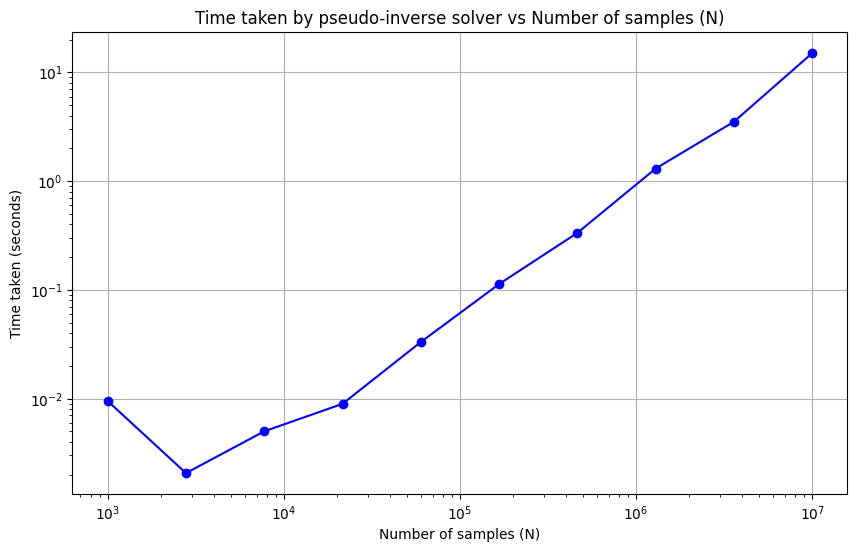

In [5]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import time


def time_pseudo_inverse(N_vals, D=10, sigma=0.1):
    times = []#list to store the time taken for different values of N
    for N in N_vals:
        # generating generator matrix S
        S=generate_random_matrix(D)
        # generating input matrix X
        X=generate_input_matrix(N,S)        
        # measuring the time taken by pseudo inverse solver function 
        start_time = time.time()
        X_pseudo_inverse = np.linalg.pinv(X)#we calculate the pseudo inverse of X
        elapsed_time = time.time() - start_time
        #appending the time taken to the list times
        times.append(elapsed_time)
    return times

# Define the range of N values (number of samples)
N_vals = np.logspace(3, 7, num=10, dtype=int)  # From 100 to 1,000,000 (logarithmic scale)
# Measure the time taken for different values of N
times = time_pseudo_inverse(N_vals)
# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(N_vals, times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of samples (N)')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by pseudo-inverse solver vs Number of samples (N)')
plt.grid(True)
plt.show()

**INFERENCE FROM ABOVE GRAPH**

The above graph is plotted between time vs logN and it is looking linear approximately which indicates that the time complexity of the np.linalg.pinv operation is growing exponentially with N. This suggests that the relationship between the time taken T and N can be described as:

T is directly proportional to N raise to k |for some constant k
Meaning the time grows polynomially with N.

Problem 4:calculate normalized root mean squared erro (NRMSE)

In [16]:
#imporint required libraries
import numpy as np
def calculate_nrmse(t, y):
    # calculating the mean squared error (MSE)
    mse = np.mean((t - y) ** 2)
    # calculating the root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    # finding the normalization factor 
    normalization_factor = np.max(t) - np.min(t)
    if normalization_factor == 0:
        return np.nan
    # calculating the normalized root mean squared error (NRMSE)
    nrmse = rmse / normalization_factor
    return nrmse

#using this function to calculate the NRMSE between the target vector t and the predicted vector y
t = np.array([3.2, 4.1, 5.6, 7.3])
y = np.array([3.0, 4.0, 5.5, 7.5])
nrmse = calculate_nrmse(t, y)
print(f"NRMSE: {nrmse:.4f}")

NRMSE: 0.0386


Problem 5:calculate the gradient of MSE wrt weights of linear regression<br>

Inputs: Data Matrix X, target vector t, weights w<br>
Outpus: gradient is of vector of dimensions equal to w

In [15]:
#importing required libraries
import numpy as np
def calculate_mse_gradient(X, t, w):
    # N is number of samples, D is number of features
    N, D = X.shape
    # calculating the predicted vector y
    y = X.dot(w)
    # calculating the error vector e
    e = y - t
    # calculating the gradient of the MSE with respect to w
    gradient = 2/N * np.dot(X.T, e)
    return gradient

#using this function to calculate the gradient of the Mean Squared Error (MSE) with respect to the weights w
X = np.array([[1, 2,3], [3, 4,5], [5, 6,2]])
t = np.array([3, 7, 11])
w = np.array([0.1, 0.2,0.5])
# Calculate the gradient
gradient = calculate_mse_gradient(X, t, w)
print("Gradient:",gradient)

Gradient: [-35.13333333 -43.6        -24.4       ]


Problem 6:Write a function to calculate gradient of L2 norm of weights with respect to weights.

In [14]:
#importing required libraries
import numpy as np
def calculate_l2_norm_gradient(w):
    # Calculate the gradient of the L1 norm with respect to w
    gradient = 2 * w
    return gradient

Problem 7: Write a function to calculate gradient of L1norm of weights with respect to weights.

In [13]:
#importing required libraries
import numpy as np
def calculate_l1_norm_gradient(w):
    # Calculate the gradient of the L2 norm with respect to w
    gradient = np.sign(w)
    return gradient

Problem 8: Write a function to perform gradient descent on MSE + λ1*L1 +λ2*L2 appropriate stopping criterion

we are using two stopping criterion:
1. gradient norm
2. maximum number of iterations

why gradient norm: The gradient measures the slope or direction of the steepest ascent of the cost function. When the gradient becomes very small (below a predefined tolerance tol), it means the weights are no longer changing significantly, indicating convergence to an optimal solution or a local minimum.

In [19]:
import numpy as np

def gradient_descent(X, t, lambda1=0.0, lambda2=0.1, learning_rate=0.01, max_iters=1000):
    N, D = X.shape  
    # Initialize weights and bias
    w = np.zeros(D + 1)  # Weights for features + one for bias
    # Gradient descent loop
    for _ in range(max_iters):
        # Compute predictions including bias
        y_pred = np.dot(X, w[1:]) + w[0]  # Use w[0] as bias
        # Calculate the error vector (residuals)
        error = t - y_pred
        # Compute the gradients for weights and bias, L1 and L2 regularization gradients
        grad_mse_w = calculate_mse_gradient(X, t, w[1:])  # Gradient of MSE w.r.t. weights
        grad_mse_b = -np.sum(error)  # Gradient of MSE w.r.t. bias
        grad_l1 = lambda1 * np.sign(w[1:])  # L1 regularization gradient
        grad_l2 = lambda2 * w[1:]  # L2 regularization gradient
        # Total gradient for weights and bias
        grad_w = grad_mse_w + grad_l1 + grad_l2
        # Update weights
        w[1:] -= (learning_rate * grad_w)
        # Update bias
        w[0] -= (learning_rate * grad_mse_b)  # Update bias separately
    return w

# Using this function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression
X = generate_input_matrix(10, np.eye(3))
true_weights = np.array([1, 2, 3])  # Change true weights to match the number of features
t = generate_target_vector(X, np.append(true_weights, 0), 0.1)  # Include bias in the true weights
# Perform gradient descent
w_optimal = gradient_descent(X, t)
print("Optimal weight vector w:")
print(w_optimal)


Optimal weight vector w:
[ 0.79380474  2.4789056   2.84712988 -0.13761829]


Problem 9:Examine the impact of σ onthe NRMSEfor linear regression using gradient descent

Running experiment for sigma=0.1 (run 1/5)
Running experiment for sigma=0.1 (run 2/5)
Running experiment for sigma=0.1 (run 3/5)
Running experiment for sigma=0.1 (run 4/5)
Running experiment for sigma=0.1 (run 5/5)
Running experiment for sigma=0.2 (run 1/5)
Running experiment for sigma=0.2 (run 2/5)
Running experiment for sigma=0.2 (run 3/5)
Running experiment for sigma=0.2 (run 4/5)
Running experiment for sigma=0.2 (run 5/5)
Running experiment for sigma=0.3 (run 1/5)
Running experiment for sigma=0.3 (run 2/5)
Running experiment for sigma=0.3 (run 3/5)
Running experiment for sigma=0.3 (run 4/5)
Running experiment for sigma=0.3 (run 5/5)
Running experiment for sigma=0.4 (run 1/5)
Running experiment for sigma=0.4 (run 2/5)
Running experiment for sigma=0.4 (run 3/5)
Running experiment for sigma=0.4 (run 4/5)
Running experiment for sigma=0.4 (run 5/5)
Running experiment for sigma=0.5 (run 1/5)
Running experiment for sigma=0.5 (run 2/5)
Running experiment for sigma=0.5 (run 3/5)
Running exp

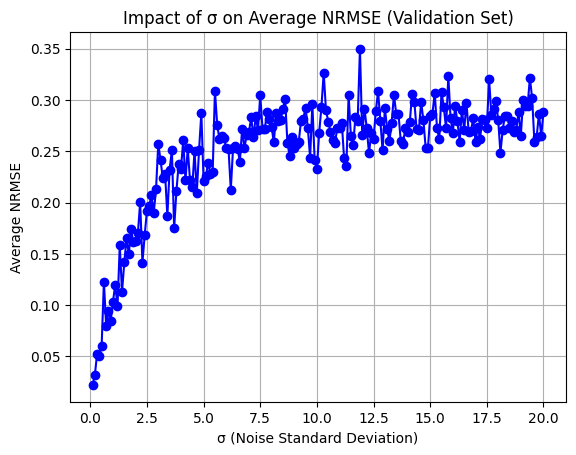

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming generate_random_matrix, generate_input_matrix, calculate_nrmse, and gradient_descent are defined above.

# Experiment to analyze the impact of σ on NRMSE
def experiment(N=100, D=10, sigma_values=np.linspace(0.1, 20, 200), lambda1=0.0, lambda2=0.1, learning_rate=0.01, max_iters=1000, n_runs=5):
    avg_nrmse_per_sigma = []
    for sigma in sigma_values:
        nrmse_vals = []
        for _ in range(n_runs):
            print(f"Running experiment for sigma={sigma} (run {_ + 1}/{n_runs})")
            # Generate fixed input matrix X and true weights
            S = generate_random_matrix(D)
            X = generate_input_matrix(N, S)
            true_weights = np.random.randn(D + 1)  # Including bias
            # Generate target vector for current sigma
            t = generate_target_vector(X, true_weights, sigma)
            # Split into training and validation sets
            X_train, X_val, t_train, t_val = X[:80], X[80:], t[:80], t[80:] 
            # Train using gradient descent
            optimal_weights = gradient_descent(X_train, t_train, lambda1, lambda2, learning_rate, max_iters)
            # Predict using weights and bias
            t_val_pred = np.dot(X_val, optimal_weights[1:]) + optimal_weights[0]  # Include the bias term
            # Calculate NRMSE on validation set
            nrmse_val = calculate_nrmse(t_val, t_val_pred)
            nrmse_vals.append(nrmse_val)
        # Average NRMSE over all runs for the current sigma
        avg_nrmse = np.mean(nrmse_vals)
        avg_nrmse_per_sigma.append(avg_nrmse)
    return avg_nrmse_per_sigma

# Run experiment
sigma_values = np.linspace(0.1, 20, 200)
avg_nrmse_per_sigma = experiment()

# Plot results
plt.plot(sigma_values, avg_nrmse_per_sigma, marker='o', linestyle='-', color='b')
plt.title('Impact of σ on Average NRMSE (Validation Set)')
plt.xlabel('σ (Noise Standard Deviation)')
plt.ylabel('Average NRMSE')
plt.grid(True)
plt.show()


Inference from the grpah:
1. The graph clearly shows a positive correlation between the noise standard deviation (σ) and the average NRMSE. As the noise level increases, the average NRMSE also increases, indicating that higher noise levels lead to greater errors in predictions.
2. The increasing NRMSE with σ suggests that noise significantly impacts the model's ability to accurately predict the target values. Higher noise levels can obscure the underlying patterns in the data, leading to less reliable predictions.

Problem 10: Examine the impact of N and λ 2  on the NRMSE for linear regression using gradient descent. Create lists of N and λ 2 values (use log scale, 5 each, 25 pairs). Average the results of the following experiment run five times for combination of N and λ2 value pair for fixed generator matrix S and noise variance σ. Comment on the results

Running for N=100, λ2=0.0001 (run 1/5)
Running for N=100, λ2=0.0001 (run 2/5)
Running for N=100, λ2=0.0001 (run 3/5)
Running for N=100, λ2=0.0001 (run 4/5)
Running for N=100, λ2=0.0001 (run 5/5)
Average NRMSE for N=100, λ2=0.0001: 0.2513
Running for N=100, λ2=0.0005623413251903491 (run 1/5)
Running for N=100, λ2=0.0005623413251903491 (run 2/5)
Running for N=100, λ2=0.0005623413251903491 (run 3/5)
Running for N=100, λ2=0.0005623413251903491 (run 4/5)
Running for N=100, λ2=0.0005623413251903491 (run 5/5)
Average NRMSE for N=100, λ2=0.0005623413251903491: 0.2396
Running for N=100, λ2=0.0031622776601683794 (run 1/5)
Running for N=100, λ2=0.0031622776601683794 (run 2/5)
Running for N=100, λ2=0.0031622776601683794 (run 3/5)
Running for N=100, λ2=0.0031622776601683794 (run 4/5)
Running for N=100, λ2=0.0031622776601683794 (run 5/5)
Average NRMSE for N=100, λ2=0.0031622776601683794: 0.2521
Running for N=100, λ2=0.01778279410038923 (run 1/5)
Running for N=100, λ2=0.01778279410038923 (run 2/5)
Ru

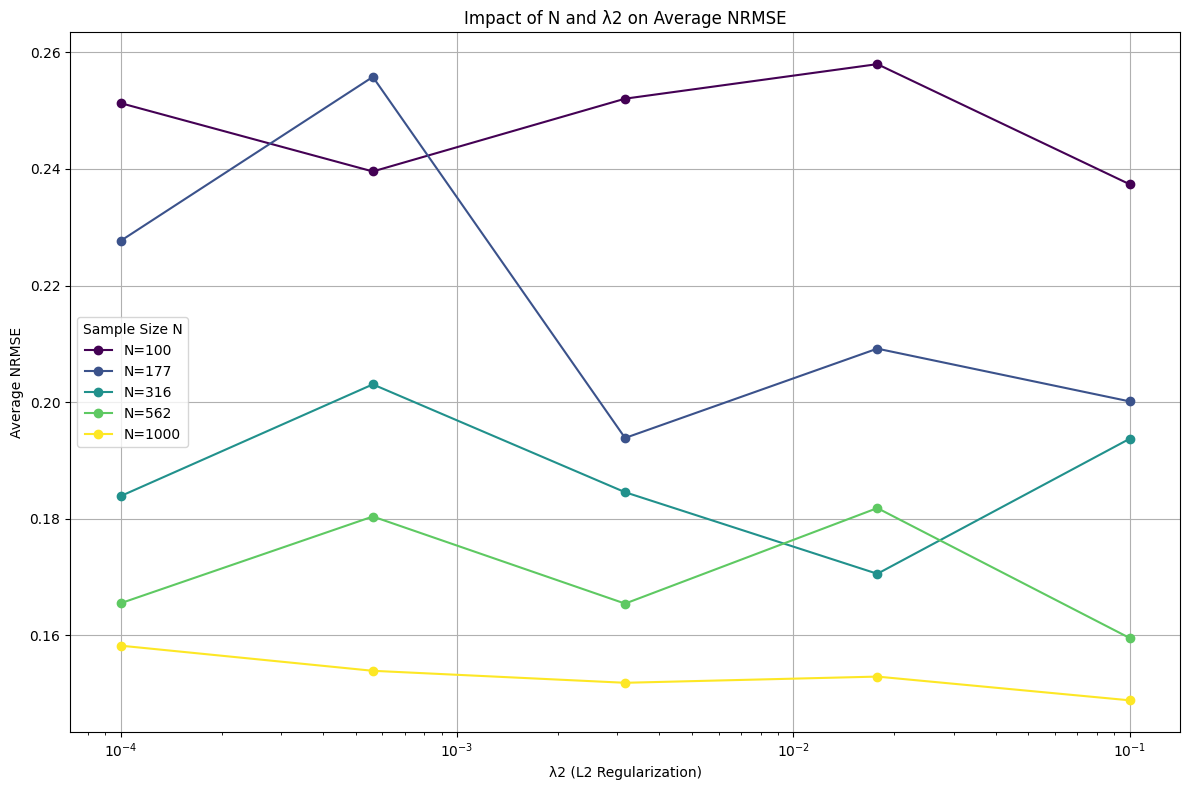

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming the required functions (generate_random_matrix, generate_input_matrix, 
# generate_target_vector, gradient_descent, calculate_nrmse) are already defined

def experiment_with_n_lambda(N_values, lambda2_values, sigma=5.0, D=10, n_runs=5):
    results = []

    # Generate a fixed generator matrix S
    S = generate_random_matrix(D)

    for N in N_values:
        for lambda2 in lambda2_values:
            nrmse_vals = []
            for run in range(n_runs):
                print(f"Running for N={N}, λ2={lambda2} (run {run + 1}/{n_runs})")
                # Generate input matrix X and target vector t
                X = generate_input_matrix(N, S)
                true_weights = np.random.randn(D + 1)  # Including bias
                t = generate_target_vector(X, true_weights, sigma)
                # Split into training and validation sets using scikit-learn
                X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)
                # Train using gradient descent
                optimal_weights = gradient_descent(X_train, t_train, learning_rate=0.001,lambda1=0.0, lambda2=lambda2)
                # Predict using weights and bias
                t_val_pred = np.dot(X_val, optimal_weights[1:]) + optimal_weights[0]  # Include bias
                nrmse_val = calculate_nrmse(t_val, t_val_pred)
                nrmse_vals.append(nrmse_val)
            # Average NRMSE over all runs for the current combination
            if nrmse_vals:  # Check if there are valid NRMSE values
                avg_nrmse = np.mean(nrmse_vals)
                results.append((N, lambda2, avg_nrmse))
                print(f"Average NRMSE for N={N}, λ2={lambda2}: {avg_nrmse:.4f}")
            else:
                print(f"No valid NRMSE values for N={N}, λ2={lambda2}. Skipping this combination.")
    return results

# Define N and λ2 values
N_values = np.logspace(2, 3, num=5, dtype=int)  # 10^2 to 10^3
lambda2_values = np.logspace(-4, -1, num=5)
  # Reasonable λ2 values
# Run the experiment
results = experiment_with_n_lambda(N_values, lambda2_values)
# Convert results to a more usable format for analysis
results_np = np.array(results)
# Plot results: for each N, plot the NRMSE against lambda2 values
plt.figure(figsize=(12, 8))
# Create a color map for different N values
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))
for i, N in enumerate(N_values):
    # Extract the corresponding results for the current N
    N_subset = results_np[results_np[:, 0] == N]
    lambda2_subset = N_subset[:, 1]
    nrmse_subset = N_subset[:, 2]
    # Plot NRMSE against λ2 for this specific N
    plt.plot(lambda2_subset, nrmse_subset, marker='o', linestyle='-', color=colors[i], label=f'N={N}')
# Set plot labels and title
plt.xscale('log')  # Logarithmic scale for λ2
plt.xlabel('λ2 (L2 Regularization)')
plt.ylabel('Average NRMSE')
plt.title('Impact of N and λ2 on Average NRMSE')
plt.legend(title="Sample Size N")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


# Observations on NRMSE vs. Data Points and Regularization

### More Data Points
- As \( N \) increases, the model gets more data points, which generally allows it to learn the underlying patterns better, leading to a lower NRMSE.

### Reduction of Overfitting
- With more data, the likelihood of overfitting to noise decreases, improving the model's generalization on unseen data.

### Too Small \( λ2\)
- The model might fit the training data too closely, leading to overfitting and higher NRMSE on validation or test data.

### Too Large \( λ2\)
- The model might be overly regularized, potentially leading to underfitting and again resulting in higher NRMSE.


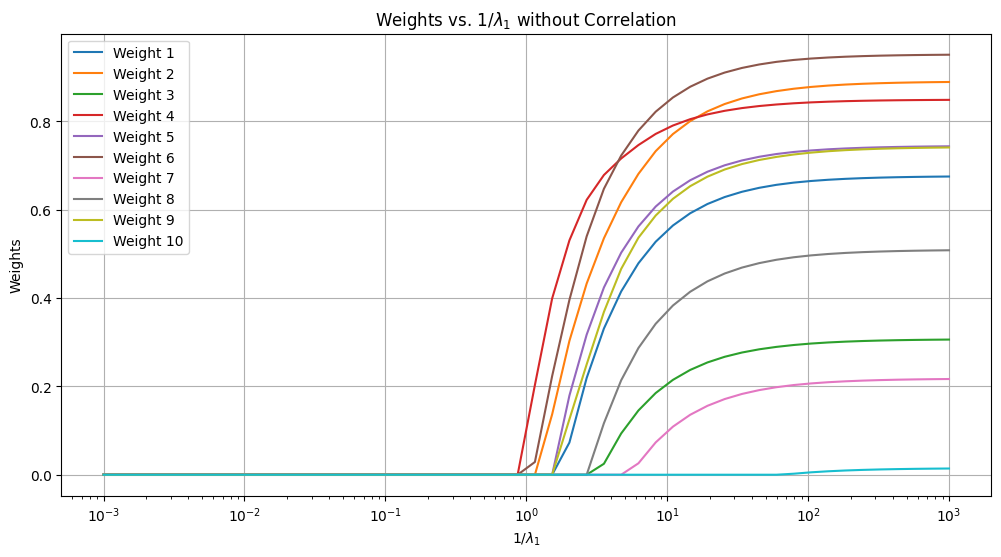

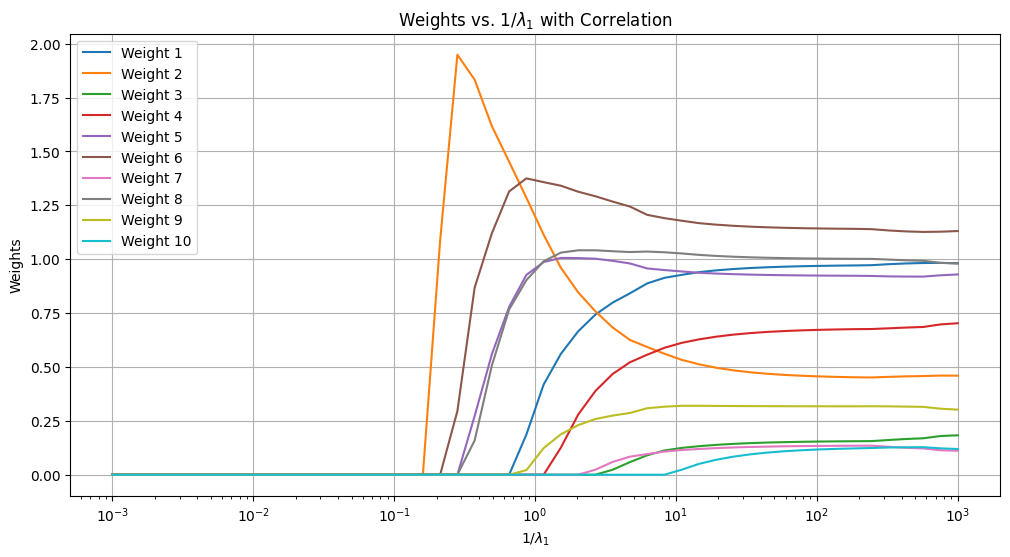

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Function to generate the data matrix
def generate_data_matrix(N, M, correlation=False):
    if correlation:
        # Create a random data matrix with correlations
        base = np.random.randn(N, 1)
        X = base + 0.1 * np.random.randn(N, M)  # Add some noise
    else:
        # Create an independent random data matrix
        X = np.random.randn(N, M)
    return X

# Function to fit Lasso regression and get weights
def fit_lasso_weights(X, y, lambda1_values):
    weights = []
    for lambda1 in lambda1_values:
        lasso = Lasso(alpha=lambda1, max_iter=10000)
        lasso.fit(X, y)
        weights.append(lasso.coef_)
    return np.array(weights)

# Parameters
N = 300  # Number of samples
M = 10   # Number of features
lambda1_values = np.logspace(-3, 3, 50)  # Values of lambda1

# Generate data matrix and response variable
X = generate_data_matrix(N, M, correlation=False)
true_weights = np.random.rand(M)  # True weights
y = X @ true_weights + np.random.randn(N) * 0.5  # Response variable

# Fit Lasso and get weights
weights_no_corr = fit_lasso_weights(X, y, lambda1_values)

# Plot weights versus 1/lambda1
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(1/lambda1_values, weights_no_corr[:, i], label=f'Weight {i+1}')
plt.xscale('log')
plt.title('Weights vs. 1/$\\lambda_1$ without Correlation')
plt.xlabel('1/$\\lambda_1$')
plt.ylabel('Weights')
plt.legend()
plt.grid(True)
plt.show()

# Introduce correlations and repeat the experiment
X_corr = generate_data_matrix(N, M, correlation=True)
y_corr = X_corr @ true_weights + np.random.randn(N) * 0.5  # Response variable with correlated features

# Fit Lasso and get weights for correlated data
weights_with_corr = fit_lasso_weights(X_corr, y_corr, lambda1_values)

# Plot weights versus 1/lambda1 for correlated data
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(1/lambda1_values, weights_with_corr[:, i], label=f'Weight {i+1}')
plt.xscale('log')
plt.title('Weights vs. 1/$\\lambda_1$ with Correlation')
plt.xlabel('1/$\\lambda_1$')
plt.ylabel('Weights')
plt.legend()
plt.grid(True)
plt.show()



## Comments on Results

### Weights vs \(1/λ₁) without Correlation:
As λ₁ increases, we expect the weights to shrink towards zero due to Lasso's regularization effect. Some weights may become exactly zero, indicating that the corresponding features are not important for the model.

### Weights vs \(1/λ₁) with Correlation:
When introducing correlations between features, the behavior of the weights may change. If features are correlated, Lasso may arbitrarily select one of the correlated features and shrink the others towards zero, leading to a more erratic pattern in the weights. This can also lead to increased variability in the estimated weights.


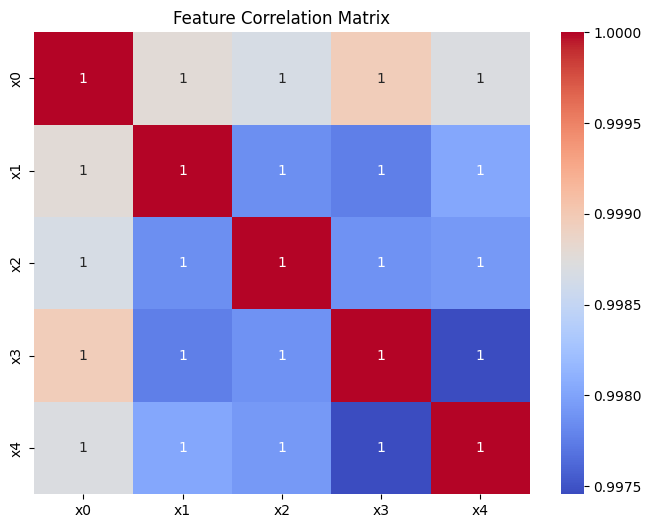

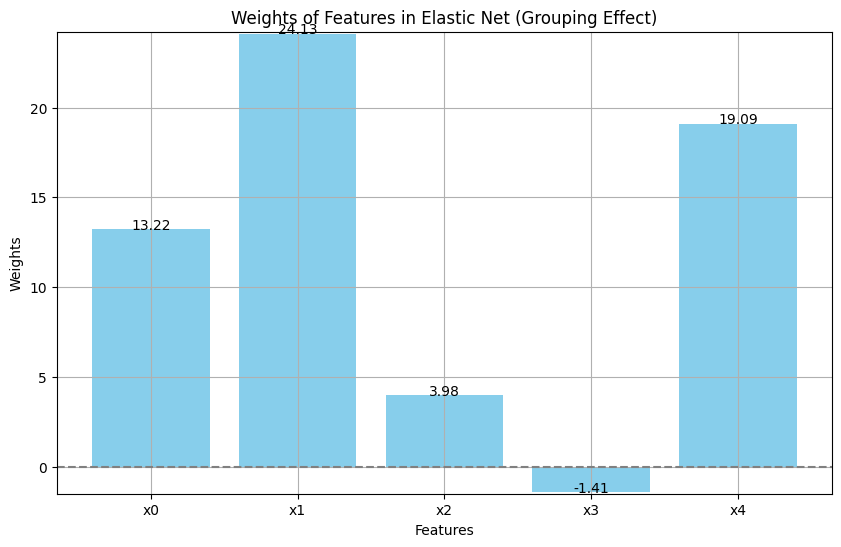

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import seaborn as sns

# Step 1: Generate correlated data
np.random.seed(42)
n_samples = 100
n_features = 5  # This can be any number of features

# Generate a regression problem
X, y, coefficients = make_regression(n_samples=n_samples, n_features=n_features, 
                                     noise=0.1, coef=True)

# Introduce correlation: make some features correlated
for i in range(1, n_features):
    X[:, i] = X[:, 0] + np.random.normal(0, 0.05, n_samples)  # Correlate all features with feature 0

# Visualizing the correlation between the features using a heatmap
corr_matrix = np.corrcoef(X.T)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=[f'x{i}' for i in range(n_features)], 
            yticklabels=[f'x{i}' for i in range(n_features)])
plt.title("Feature Correlation Matrix")
plt.show()

# Step 2: Fit an Elastic Net model
lambda1 = 0.1  # L2 regularization parameter (alpha)
lambda2 = 0.5  # Mixing parameter (l1_ratio between Ridge and Lasso)

elastic_net = ElasticNet(alpha=lambda1, l1_ratio=lambda2)
elastic_net.fit(X, y)

# Step 3: Visualize weights (showing grouping effect)
weights = elastic_net.coef_
feature_indices = np.arange(n_features)

plt.figure(figsize=(10, 6))
plt.bar(feature_indices, weights, color='skyblue')
plt.xticks(feature_indices, [f'x{i}' for i in range(n_features)])
plt.axhline(0, color='gray', linestyle='--')
plt.title('Weights of Features in Elastic Net (Grouping Effect)')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.ylim(min(weights) - 0.1, max(weights) + 0.1)
plt.grid()

# Annotate weights on bars
for i in range(n_features):
    plt.text(i, weights[i] + 0.02 if weights[i] >= 0 else weights[i] - 0.05, 
             f'{weights[i]:.2f}', ha='center', color='black')

plt.show()


Problem 13:To generate a linear binary classification vector t with noise variance σ

In [7]:
import numpy as np
def generate_binary_classification(X, w, sigma):
    # Step 1: Add a bias column (ones) to X
    N, D = X.shape
    X_bias = np.hstack([X, np.ones((N, 1))])  # Add a column of ones to X for bias term

    # Step 2: Compute the linear combination of X and w (with bias included)
    linear_combination = X_bias @ w

    # Step 3: Add Gaussian noise with variance sigma^2
    noise = np.random.normal(0, sigma, size=linear_combination.shape)
    noisy_output = linear_combination + noise

    # Step 4: Convert to binary labels using a threshold (e.g., 0)
    t = (noisy_output > 0).astype(int)  # Use 0 as threshold to assign 0 or 1
    
    return t

# Generate example input data
np.random.seed(42)
n_samples = 100
n_features = 2
X = np.random.randn(n_samples, n_features)

# Define weight vector
w = np.array([1.0, -0.5, 0.5])  # Include bias term as first element

# Generate binary classification targets with noise
sigma = 0.5
t = generate_binary_classification(X, w, sigma)

print(t[:10])  # Show first 10 binary labels

[1 1 1 1 0 0 1 0 0 1]


Problem 14: The gradient of binary cross-entropy for logistic regression 

In [8]:
import numpy as np

def sigmoid(z):
    # Compute the sigmoid function.
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, t, w):

    # Step 1: Compute the predicted probabilities using the sigmoid function
    z = X @ w  # Linear combination (n_samples,)
    y_pred = sigmoid(z)  # Predicted probabilities (n_samples,)
    
    # Step 2: Compute the gradient of the binary cross-entropy loss
    n_samples = X.shape[0]
    gradient = (1 / n_samples) * (X.T @ (y_pred - t))  # Shape: (n_features,)
    
    return gradient
# Example data
np.random.seed(42)
n_samples = 100
n_features = 2
X = np.random.randn(n_samples, n_features)

# True labels
t = np.random.randint(0, 2, size=n_samples)

# Random initial weights
w = np.random.randn(n_features)

# Compute gradient
grad = compute_gradient(X, t, w)

print("Gradient:", grad)


Gradient: [0.19063587 0.10510814]


In [9]:
# Function to calculate binary classification accuracy
def calculate_accuracy(t, y_pred):
    y_pred_binary = (y_pred >= 0.6).astype(int)
    accuracy = np.mean(t == y_pred_binary)
    return accuracy

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define a function to calculate binary log loss (binary cross-entropy loss)
def calculate_log_loss(t_true, y_pred_prob):
    epsilon = 1e-15  # To avoid log(0)
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    log_loss = -np.mean(t_true * np.log(y_pred_prob) + (1 - t_true) * np.log(1 - y_pred_prob))
    return log_loss

def experiment_binary_with_n_lambda_log_loss(N_values, lambda2_values, sigma=0.1, D=10, n_runs=5):
    results = []
    S = generate_random_matrix(D)  # Fixed generator matrix for reproducibility

    for N in N_values:
        for lambda2 in lambda2_values:
            log_loss_vals = []
            for run in range(n_runs):
                print(f"Running binary classification for N={N}, λ2={lambda2} (run {run + 1}/{n_runs})")
                
                # Generate input matrix X and binary target vector t
                X = generate_input_matrix(N, S)
                true_weights = np.random.randn(D + 1)  # Including bias
                t = generate_binary_classification(X, true_weights, sigma)

                # Split into training and validation sets
                X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

                # Train using gradient descent (logistic regression)
                optimal_weights = gradient_descent(X_train, t_train, learning_rate=0.001, lambda1=0.0, lambda2=lambda2)
                
                # Predict probabilities using sigmoid function
                y_val_pred_prob = sigmoid(np.dot(X_val, optimal_weights[1:]) + optimal_weights[0])  # Include bias term
                
                # Calculate log loss
                log_loss_val = calculate_log_loss(t_val, y_val_pred_prob)
                log_loss_vals.append(log_loss_val)
                
                # Debugging output for tracking predictions
                if run == 0:  # Show details for the first run
                    print("True labels:", t_val[:10])
                    print("Predicted probabilities:", y_val_pred_prob[:10])
                    print(f"Log loss for this run: {log_loss_val:.4f}")

            # Calculate average log loss over all runs
            if log_loss_vals:
                avg_log_loss = np.mean(log_loss_vals)
                results.append((N, lambda2, avg_log_loss))
                print(f"Average log loss for N={N}, λ2={lambda2}: {avg_log_loss:.4f}")
            else:
                print(f"No valid log loss values for N={N}, λ2={lambda2}. Skipping this combination.")

    return results


# Define N and λ2 values
N_values = np.logspace(2, 4, num=10, dtype=int)  # Sample sizes from 10^2 to 10^3
lambda2_values = np.logspace(-3, 3, num=10)  # Reasonable λ2 values for regularization

# Run the binary classification experiment with log loss
results_binary_log_loss = experiment_binary_with_n_lambda_log_loss(N_values, lambda2_values)

# Convert results to a more usable format for analysis
results_binary_log_loss_np = np.array(results_binary_log_loss)

# Plot results: for each N, plot the log loss against λ2 values
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))  # Create a color map for different N values

for i, N in enumerate(N_values):
    # Extract the corresponding results for the current N
    N_subset = results_binary_log_loss_np[results_binary_log_loss_np[:, 0] == N]
    lambda2_subset = N_subset[:, 1]
    log_loss_subset = N_subset[:, 2]
    
    # Plot log loss against λ2 for this specific N
    plt.plot(lambda2_subset, log_loss_subset, marker='o', linestyle='-', color=colors[i], label=f'N={N}')

# Set plot labels and title
plt.xscale('log')  # Logarithmic scale for λ2
plt.xlabel('λ2 (L2 Regularization)')
plt.ylabel('Average Log Loss')
plt.title('Impact of N and λ2 on Average Log Loss for Binary Classification')
plt.legend(title="Sample Size N")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Running binary classification for N=100, λ2=1e-05 (run 1/5)


True labels: [1 1 1 1 1 1 1 1 0 0]
Predicted probabilities: [0.75791999 0.66019552 0.54433296 0.59975958 0.65521407 0.53360129
 0.67576085 0.83471987 0.52624438 0.63476444]
Log loss for this run: 0.5668
Running binary classification for N=100, λ2=1e-05 (run 2/5)
Running binary classification for N=100, λ2=1e-05 (run 3/5)
Running binary classification for N=100, λ2=1e-05 (run 4/5)
Running binary classification for N=100, λ2=1e-05 (run 5/5)
Average log loss for N=100, λ2=1e-05: 0.5695
Running binary classification for N=100, λ2=1.610262027560939e-05 (run 1/5)
True labels: [0 1 0 0 0 0 0 0 0 0]
Predicted probabilities: [0.57320572 0.66091492 0.55330551 0.60372663 0.56132801 0.5257623
 0.58337013 0.588116   0.56817732 0.59040155]
Log loss for this run: 0.7730
Running binary classification for N=100, λ2=1.610262027560939e-05 (run 2/5)
Running binary classification for N=100, λ2=1.610262027560939e-05 (run 3/5)
Running binary classification for N=100, λ2=1.610262027560939e-05 (run 4/5)
Runnin

KeyboardInterrupt: 